In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
root_dir = "."
evaluation_dir = root_dir + "/evaluation"
df = pd.read_excel(f"{root_dir}/data/stress.xlsx")

In [28]:
df.head()

,Zaman damgası,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?",Puan
0,2023-05-04 16:56:56.174,Bazen,Bazen,Sıklıkla,Sıklıkla,Sıklıkla,Bazen,Bazen,Nadiren,Bazen,Bazen,Nadiren,Her Zaman,Sıklıkla,Bazen,0
1,2023-05-04 17:03:36.844,Nadiren,Bazen,Bazen,Sıklıkla,Sıklıkla,Sıklıkla,Bazen,Nadiren,Bazen,Sıklıkla,Nadiren,Her Zaman,Sıklıkla,Bazen,0
2,2023-05-04 17:04:10.076,Nadiren,Bazen,Sıklıkla,Her Zaman,Her Zaman,Sıklıkla,Bazen,Hiç,Sıklıkla,Sıklıkla,Hiç,Her Zaman,Sıklıkla,Nadiren,0
3,2023-05-05 10:41:46.058,Hiç,Sıklıkla,Sıklıkla,Bazen,Bazen,Nadiren,Nadiren,Sıklıkla,Bazen,Bazen,Sıklıkla,Her Zaman,Sıklıkla,Sıklıkla,0
4,2023-05-05 10:45:21.998,Nadiren,Nadiren,Nadiren,Sıklıkla,Hiç,Nadiren,Nadiren,Sıklıkla,Sıklıkla,Bazen,Hiç,Bazen,Bazen,Bazen,0


In [29]:
df.drop(["Zaman damgası"], axis = 1, inplace=True)
df.drop(["Puan"], axis = 1, inplace=True)
df.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?"
0,Bazen,Bazen,Sıklıkla,Sıklıkla,Sıklıkla,Bazen,Bazen,Nadiren,Bazen,Bazen,Nadiren,Her Zaman,Sıklıkla,Bazen
1,Nadiren,Bazen,Bazen,Sıklıkla,Sıklıkla,Sıklıkla,Bazen,Nadiren,Bazen,Sıklıkla,Nadiren,Her Zaman,Sıklıkla,Bazen
2,Nadiren,Bazen,Sıklıkla,Her Zaman,Her Zaman,Sıklıkla,Bazen,Hiç,Sıklıkla,Sıklıkla,Hiç,Her Zaman,Sıklıkla,Nadiren
3,Hiç,Sıklıkla,Sıklıkla,Bazen,Bazen,Nadiren,Nadiren,Sıklıkla,Bazen,Bazen,Sıklıkla,Her Zaman,Sıklıkla,Sıklıkla
4,Nadiren,Nadiren,Nadiren,Sıklıkla,Hiç,Nadiren,Nadiren,Sıklıkla,Sıklıkla,Bazen,Hiç,Bazen,Bazen,Bazen


In [30]:
label_map = { "Hiç":0, "Nadiren":1 , "Bazen":2, "Sıklıkla":3, "Her Zaman":4}

# Replace labels with numerical values using replace()
df.replace(label_map, inplace=True)
df.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?"
0,2,2,3,3,3,2,2,1,2,2,1,4,3,2
1,1,2,2,3,3,3,2,1,2,3,1,4,3,2
2,1,2,3,4,4,3,2,0,3,3,0,4,3,1
3,0,3,3,2,2,1,1,3,2,2,3,4,3,3
4,1,1,1,3,0,1,1,3,3,2,0,2,2,2


Ters puanlanan maddeler: 3, 4, 5, 6, 8, 9, 12 (Pozitif sorular)

Faktör I: Yetersiz özyeterlik algısı -> 3, 4, 5, 7, 8, 9, 12 </br>
Faktör II: Stres/rahatsızlık algısı -> 0, 1, 2, 6, 10, 11, 13

In [31]:
positive_idx = [3, 4, 5, 6, 8, 9, 12]
negative_idx = [0, 1, 2, 7, 10, 11, 13]

factor_1_idx = [3, 4, 5, 7, 8, 9, 12] 
factor_2_idx = [0, 1, 2, 6, 10, 11, 13]

In [32]:
# Define mapping for reversed score system
reversed_scores = {0: 4, 1: 3, 2: 2, 3: 1, 4: 0}

# Define function to calculate score for a row
def calculate_score(row):
    positive_question = sum([reversed_scores[row[idx]] for idx in positive_idx])
    negative_question = sum([row[idx] for idx in negative_idx])
    score = positive_question + negative_question
    return score

# Apply function to create a new column "score"
df['score'] = df.apply(calculate_score, axis=1)

In [33]:
df.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?",score
0,2,2,3,3,3,2,2,1,2,2,1,4,3,2,26
1,1,2,2,3,3,3,2,1,2,3,1,4,3,2,22
2,1,2,3,4,4,3,2,0,3,3,0,4,3,1,17
3,0,3,3,2,2,1,1,3,2,2,3,4,3,3,34
4,1,1,1,3,0,1,1,3,3,2,0,2,2,2,26


In [34]:
# Define function to calculate score for a row
def calculate_factor_score(row):
    factor_1 = 0; factor_2 = 0
    
    # Calculate scores 
    for idx in factor_1_idx:
        if idx in positive_idx:
            factor_1 += reversed_scores[row[idx]]
        else:
            factor_1 += row[idx]
    
    for idx in factor_2_idx:
        if idx in positive_idx:
            factor_2 += reversed_scores[row[idx]]
        else:
            factor_2 += row[idx]

    return factor_1, factor_2

df['factor_1_score'], df['factor_2_score'] = zip(*df.apply(calculate_factor_score, axis=1))

In [35]:
df[32:38]

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?",score,factor_1_score,factor_2_score
32,3,3,4,1,1,1,1,3,1,0,4,4,2,4,46,21,25
33,3,1,3,2,2,3,2,0,2,2,3,3,3,3,28,10,18
34,1,3,3,2,1,2,2,1,3,2,2,3,3,2,28,12,16
35,2,4,3,2,1,0,1,2,1,2,3,4,1,4,42,19,23
36,3,2,4,2,2,2,1,1,0,0,3,4,0,3,41,19,22
37,3,2,3,1,2,2,1,3,0,2,1,1,1,3,35,19,16


In [36]:
stress_threshold = 28
factor_threshold = 14

# Define function to calculate stress level
def calculate_stress(row):
    if row['score'] >= stress_threshold:
        return 1
    else:
        return 0
    
# Apply function to create a new column "stress"
df['stress'] = df.apply(calculate_stress, axis=1)

# Define function to calculate stress level
def calculate_factor1(row):
    if row['factor_1_score'] >= factor_threshold:
        return 1
    else:
        return 0
    
# Apply function to create a new column "stress"
df['factor_1'] = df.apply(calculate_factor1, axis=1)

# Define function to calculate stress level
def calculate_factor2(row):
    if row['factor_2_score'] >= factor_threshold:
        return 1
    else:
        return 0
    
# Apply function to create a new column "stress"
df['factor_2'] = df.apply(calculate_factor2, axis=1)
    

In [37]:
df.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?",score,factor_1_score,factor_2_score,stress,factor_1,factor_2
0,2,2,3,3,3,2,2,1,2,2,1,4,3,2,26,10,16,0,0,1
1,1,2,2,3,3,3,2,1,2,3,1,4,3,2,22,8,14,0,0,1
2,1,2,3,4,4,3,2,0,3,3,0,4,3,1,17,4,13,0,0,0
3,0,3,3,2,2,1,1,3,2,2,3,4,3,3,34,15,19,1,1,1
4,1,1,1,3,0,1,1,3,3,2,0,2,2,2,26,16,10,0,1,0


In [38]:
df[:5].iloc[:, 14:]

,score,factor_1_score,factor_2_score,stress,factor_1,factor_2
0,26,10,16,0,0,1
1,22,8,14,0,0,1
2,17,4,13,0,0,0
3,34,15,19,1,1,1
4,26,16,10,0,1,0


In [39]:
df.to_csv('preprocessed_data.csv', encoding='utf-8', index=False)

In [40]:
df["score"].describe()

count    150.000000
mean      27.726667
std        9.650884
min        4.000000
25%       20.000000
50%       27.000000
75%       35.000000
max       52.000000
Name: score, dtype: float64

In [41]:
df["factor_1_score"].describe()

count    150.000000
mean      12.120000
std        5.565859
min        0.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       26.000000
Name: factor_1_score, dtype: float64

In [42]:
df["factor_2_score"].describe()

count    150.000000
mean      15.606667
std        5.359426
min        2.000000
25%       11.000000
50%       16.000000
75%       20.000000
max       28.000000
Name: factor_2_score, dtype: float64

In [43]:
print("Stress: ", df['stress'].value_counts()[1])
print("No Stress: ", df['stress'].value_counts()[0])
print("\n")
print("Possess Factor 1: ", df['factor_1'].value_counts()[1])
print("No Factor 1: ", df['factor_1'].value_counts()[0])
print("\n")
print("Possess Factor 2: ", df['factor_2'].value_counts()[1])
print("No Factor 2: ", df['factor_2'].value_counts()[0])


Stress:  74
No Stress:  76


Possess Factor 1:  61
No Factor 1:  89


Possess Factor 2:  90
No Factor 2:  60


In [44]:
eda_path = f"{root_dir}/eda"

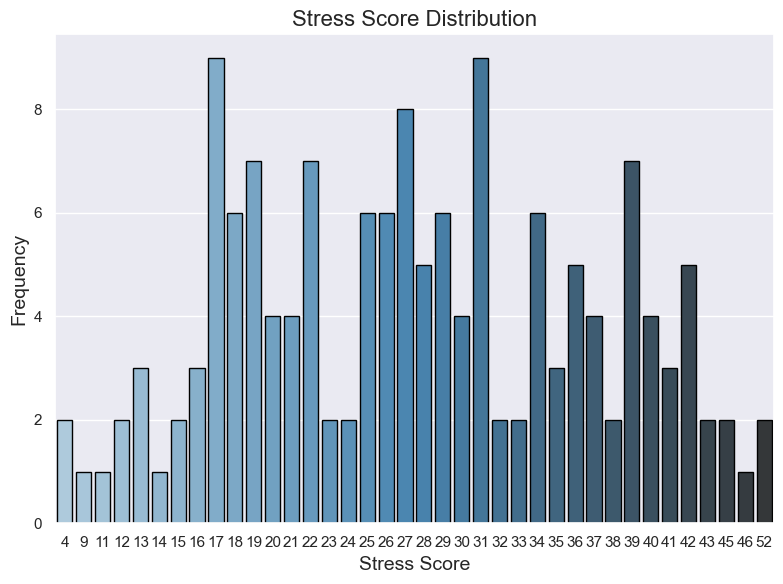

In [45]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='score', data=df, ax=ax, palette='Blues_d', edgecolor='black', linewidth=1)
ax.set_title('Stress Score Distribution', fontsize=16)
ax.set_xlabel('Stress Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.savefig(f'{eda_path}/stress_score_dist.png')
plt.savefig(f'{eda_path}/stress_score_dist.pdf')
plt.show()

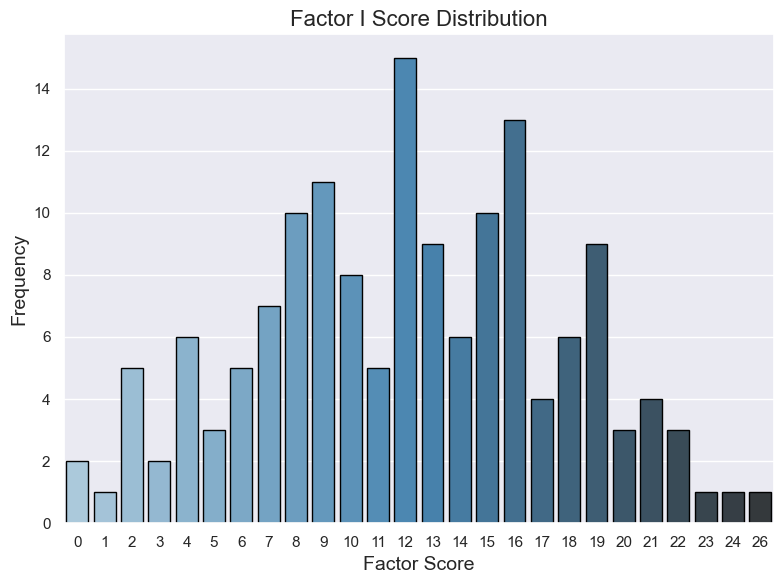

In [46]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='factor_1_score', data=df, ax=ax, palette='Blues_d', edgecolor='black', linewidth=1)
ax.set_title('Factor I Score Distribution', fontsize=16)
ax.set_xlabel('Factor Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.savefig(f'{eda_path}/factor1_score_dist.png')
plt.savefig(f'{eda_path}/factor1_score_dist.pdf')
plt.show()

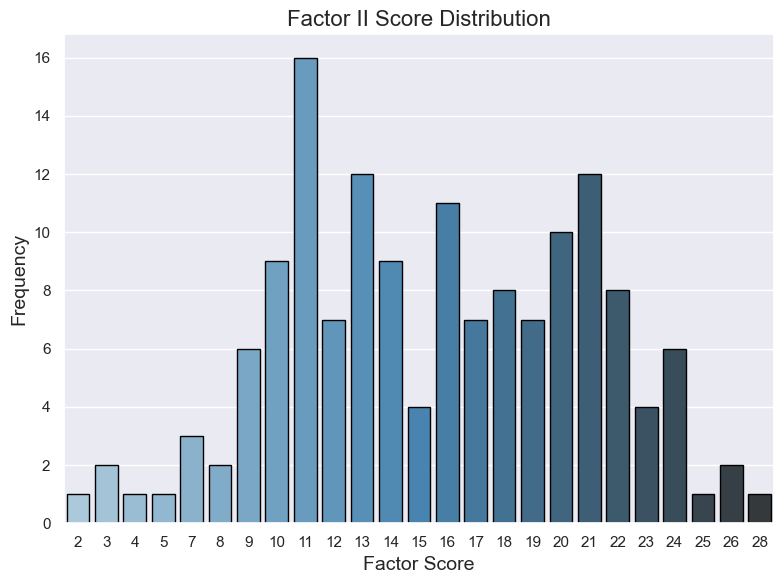

In [47]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='factor_2_score', data=df, ax=ax, palette='Blues_d', edgecolor='black', linewidth=1)
ax.set_title('Factor II Score Distribution', fontsize=16)
ax.set_xlabel('Factor Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.savefig(f'{eda_path}/factor2_score_dist.png')
plt.savefig(f'{eda_path}/factor2_score_dist.pdf')
plt.show()

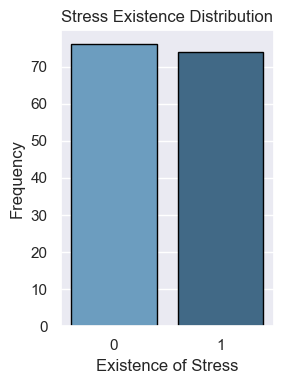

In [48]:
# Set the figure size
plt.figure(figsize=(3,4))

# Create the histogram plot
sns.countplot(df["stress"], dodge=False, palette="Blues_d", edgecolor='black', linewidth=1)

# Set the plot title and axis labels
plt.title("Stress Existence Distribution")
plt.xlabel("Existence of Stress")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(f'{eda_path}/stress_existence_dist.png')
plt.savefig(f'{eda_path}/stress_existence_dist.pdf')
# Show the plot
plt.show()

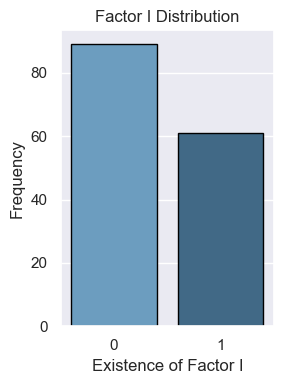

In [49]:
# Set the figure size
plt.figure(figsize=(3,4))

# Create the histogram plot
sns.countplot(df["factor_1"], dodge=False, palette="Blues_d", edgecolor='black', linewidth=1)

plt.title("Factor I Distribution")
plt.xlabel("Existence of Factor I")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig(f'{eda_path}/factor1_existence_dist.png')
plt.savefig(f'{eda_path}/factor1_existence_dist.pdf')
# Show the plot
plt.show()


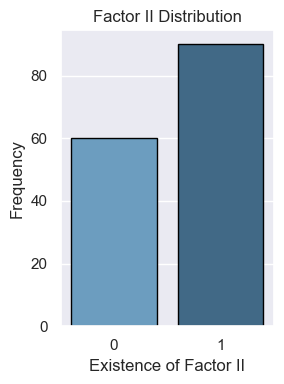

In [50]:
# Set the figure size
plt.figure(figsize=(3,4))

# Create the histogram plot
sns.countplot(df["factor_2"], dodge=False, palette="Blues_d", edgecolor='black', linewidth=1)

plt.title("Factor II Distribution")
plt.xlabel("Existence of Factor II")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig(f'{eda_path}/factor2_existence_dist.png')
plt.savefig(f'{eda_path}/factor2_existence_dist.pdf')
# Show the plot
plt.show()